In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('World_Billionaire_2024.csv')

In [3]:
data.head()

,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
0,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
1,1,"Tesla, SpaceX",Elon Musk,$212.3 B,United States
2,2,Amazon,Jeff Bezos,$203.5 B,United States
3,3,LVMH,Bernard Arnault & family,$194.3 B,France
4,4,Facebook,Mark Zuckerberg,$175.9 B,United States


In [4]:
data.iloc[0]

RANK                        RANK
COMPANY                  COMPANY
EXECUTIVE NAME    EXECUTIVE NAME
NET WORTH              NET WORTH
COUNTRY                  COUNTRY
Name: 0, dtype: object

In [5]:
data = data.set_index('RANK')

In [6]:
data.head()

,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
RANK,,,,
RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
1,"Tesla, SpaceX",Elon Musk,$212.3 B,United States
2,Amazon,Jeff Bezos,$203.5 B,United States
3,LVMH,Bernard Arnault & family,$194.3 B,France
4,Facebook,Mark Zuckerberg,$175.9 B,United States


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2743 entries, RANK to 2742
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   COMPANY         2740 non-null   object
 1   EXECUTIVE NAME  2743 non-null   object
 2   NET WORTH       2743 non-null   object
 3   COUNTRY         2743 non-null   object
dtypes: object(4)
memory usage: 107.1+ KB


In [8]:
data.isnull().sum()

COMPANY           3
EXECUTIVE NAME    0
NET WORTH         0
COUNTRY           0
dtype: int64

In [9]:
data=data.dropna(axis=0)

In [10]:
data['NET WORTH'] = data['NET WORTH'].replace(['[$,B]'],'',regex=True)

In [11]:
data['NET WORTH'] = pd.to_numeric(data['NET WORTH'],errors='coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2740 entries, RANK to 2742
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   COMPANY         2740 non-null   object 
 1   EXECUTIVE NAME  2740 non-null   object 
 2   NET WORTH       2739 non-null   float64
 3   COUNTRY         2740 non-null   object 
dtypes: float64(1), object(3)
memory usage: 107.0+ KB


In [13]:
data= data.dropna(axis=0)

In [14]:
data.isnull().sum()

COMPANY           0
EXECUTIVE NAME    0
NET WORTH         0
COUNTRY           0
dtype: int64

In [15]:
data.describe()

,NET WORTH
count,2739.000000
mean,5.252829
std,12.932889
min,0.400000
25%,1.500000
50%,2.400000
75%,4.700000
max,212.300000


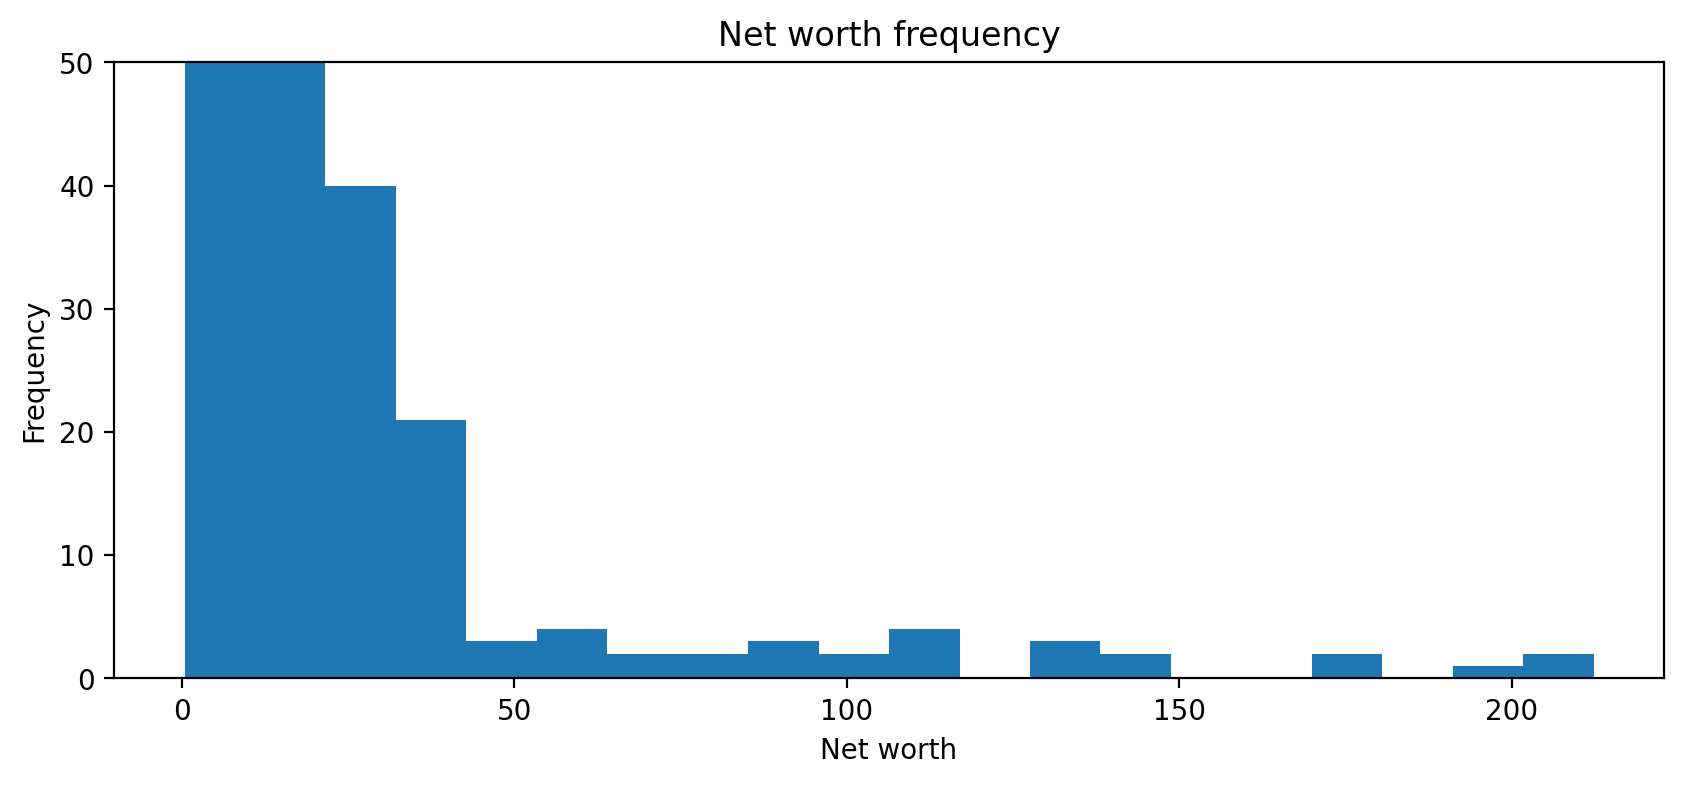

In [16]:
plt.figure(figsize=(10,4) ,dpi=200)
plt.hist(data['NET WORTH'],bins=20)
plt.title('Net worth frequency')
plt.ylim(0,50)
plt.xlabel('Net worth')
plt.ylabel('Frequency');

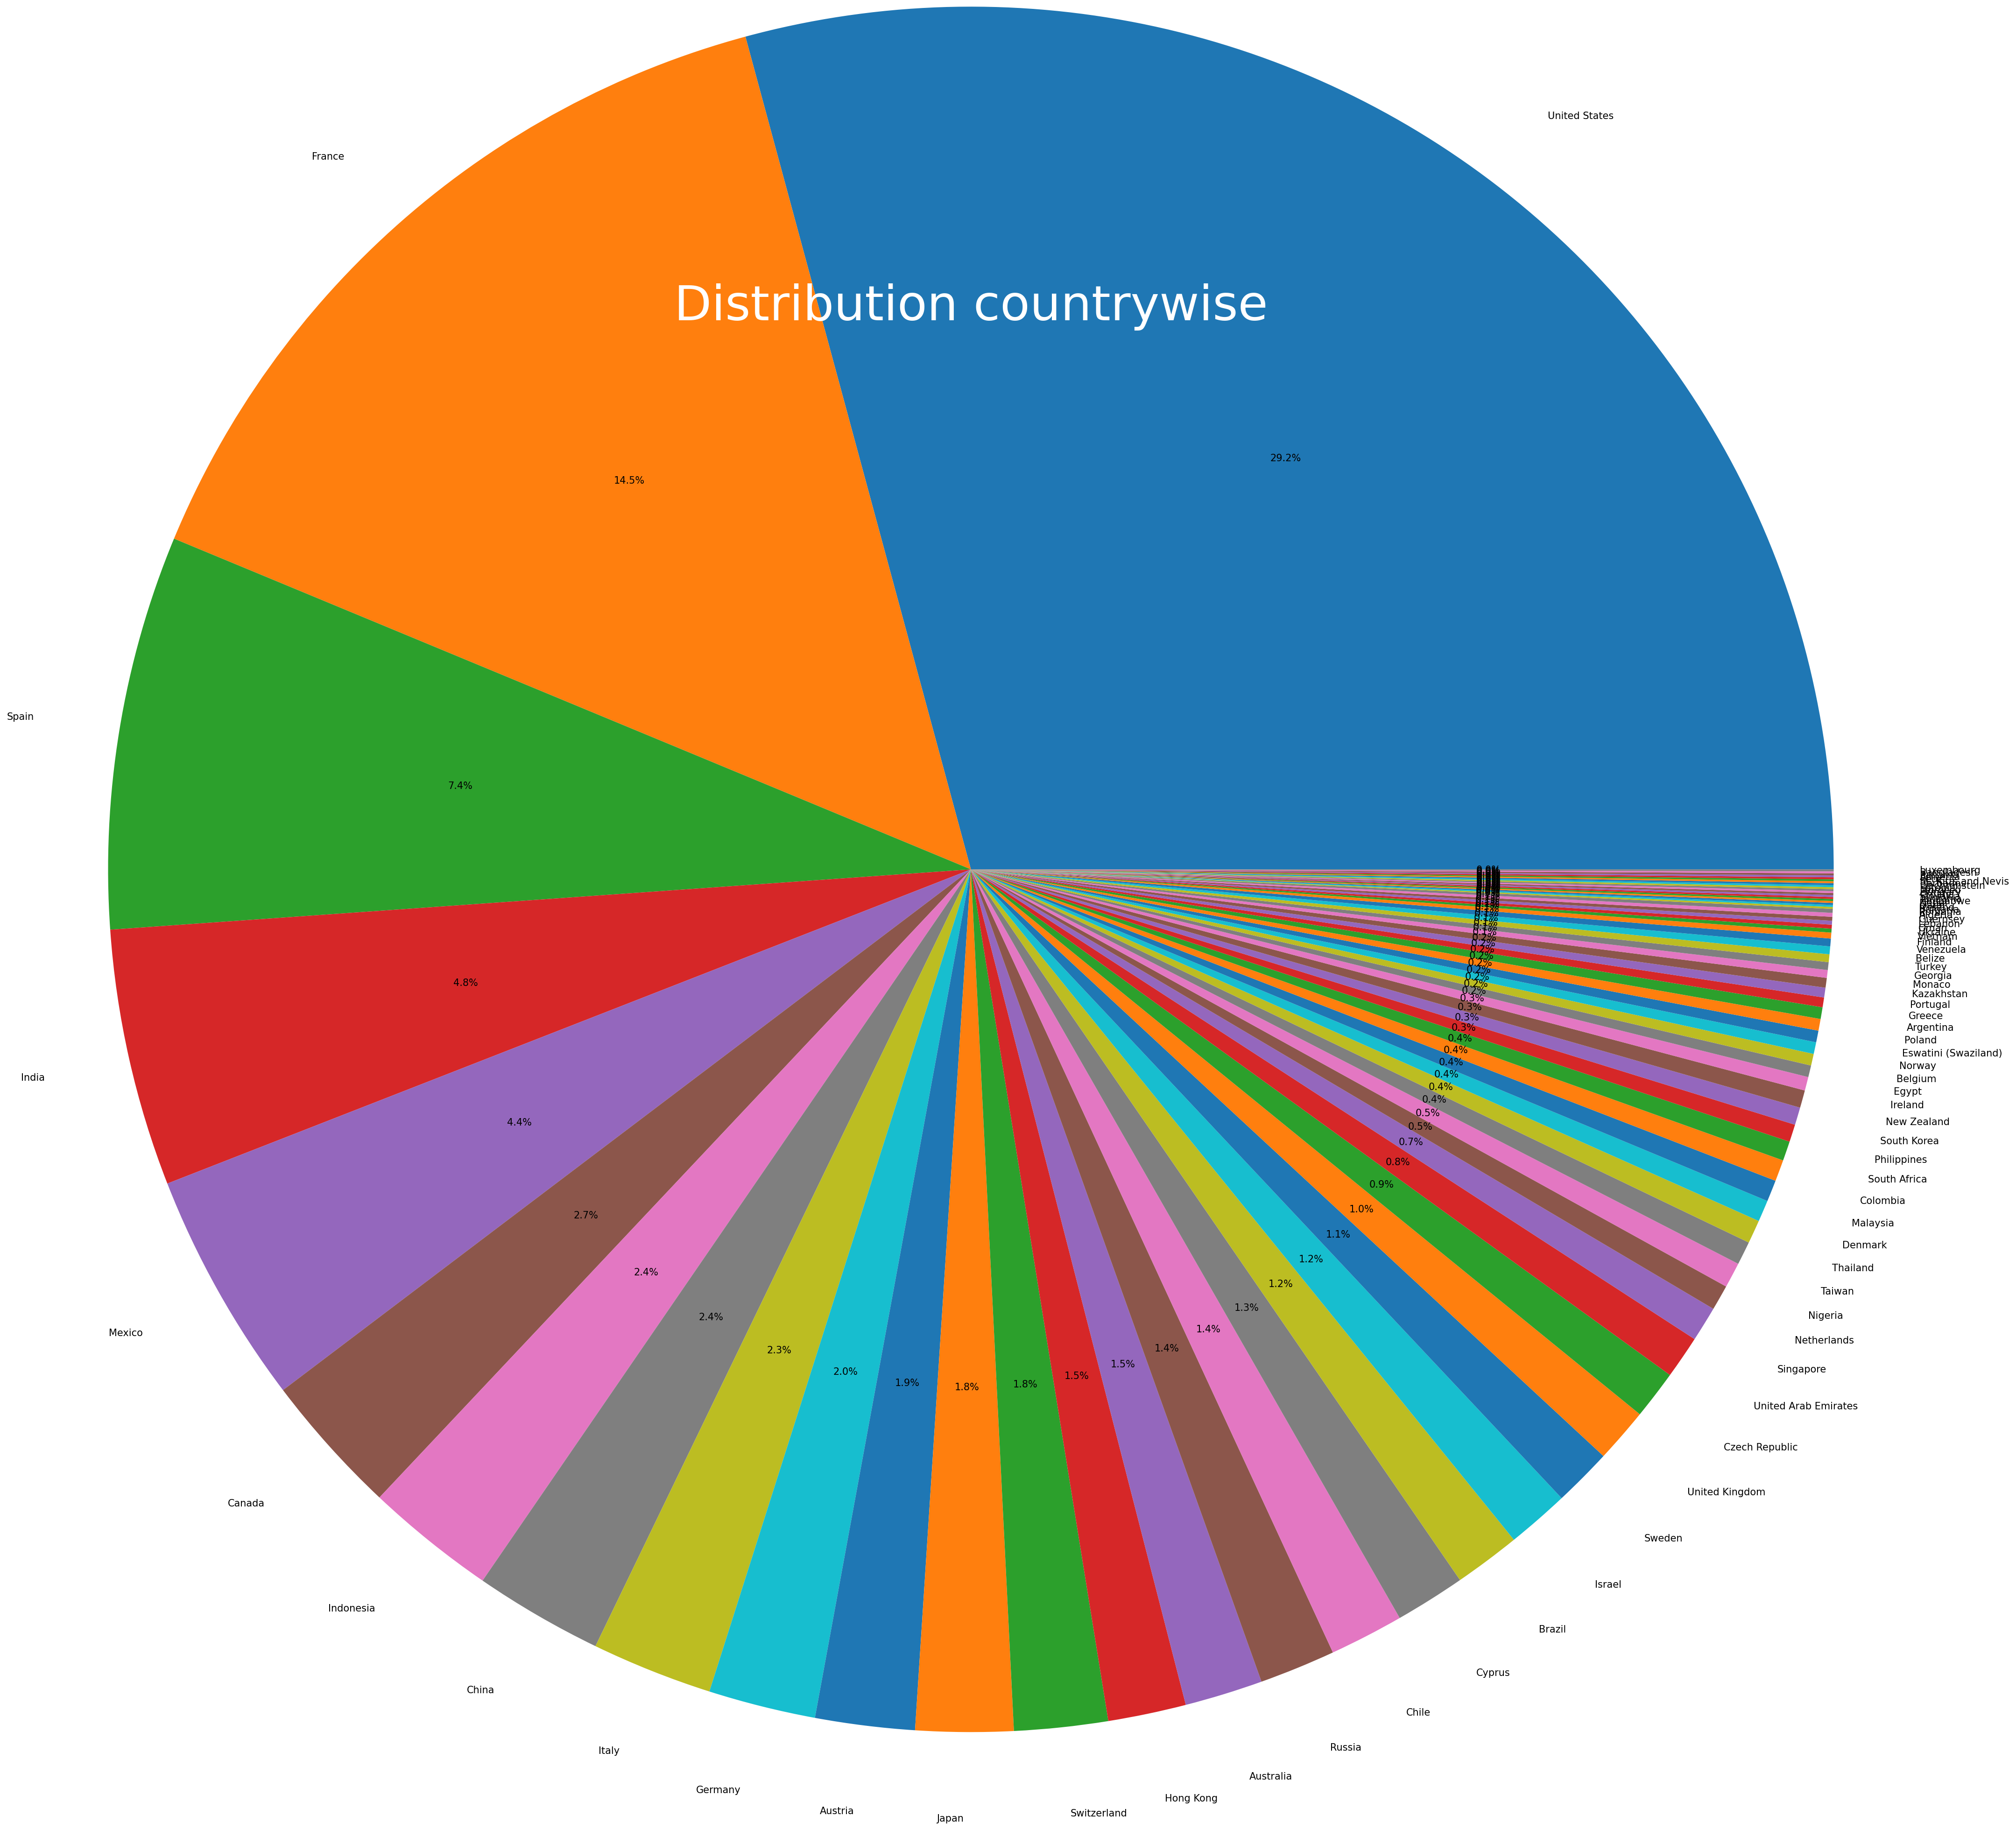

In [17]:
plt.figure(figsize=(20,20),dpi=150)
plt.pie(data['COUNTRY'].value_counts(),labels=data['COUNTRY'].unique(),autopct= '%1.1f%%',radius=2)
plt.title('Distribution countrywise',fontdict={'fontsize':50,'color':'white'});

In [18]:
top_10 = data.nlargest(10,'NET WORTH')

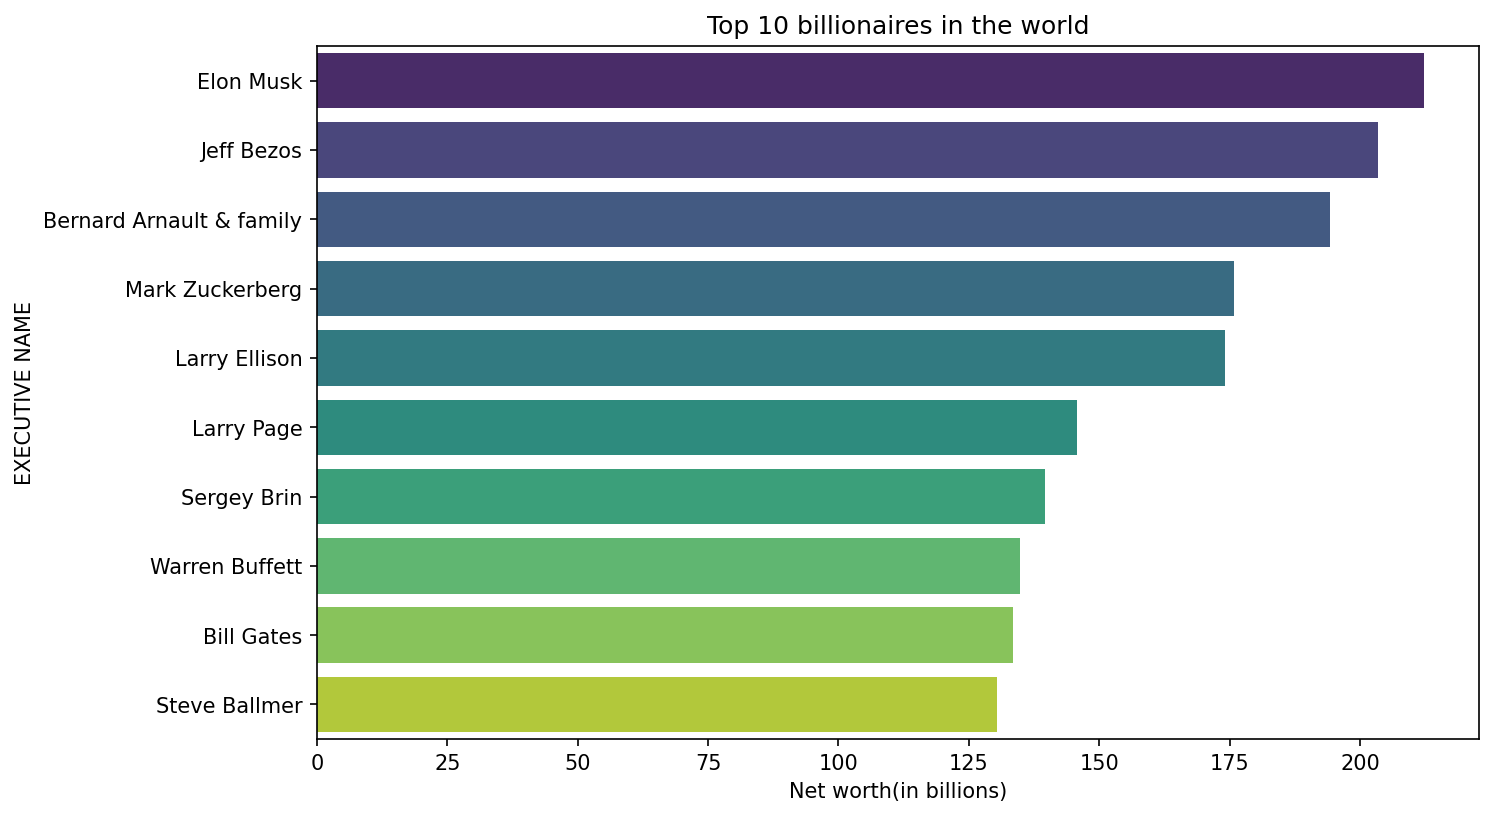

In [19]:
plt.figure(figsize=(10,6),dpi=150)
sns.barplot(x='NET WORTH' , y='EXECUTIVE NAME' , data = top_10 , palette='viridis')
plt.xlabel('Net worth(in billions)')
plt.title('Top 10 billionaires in the world');

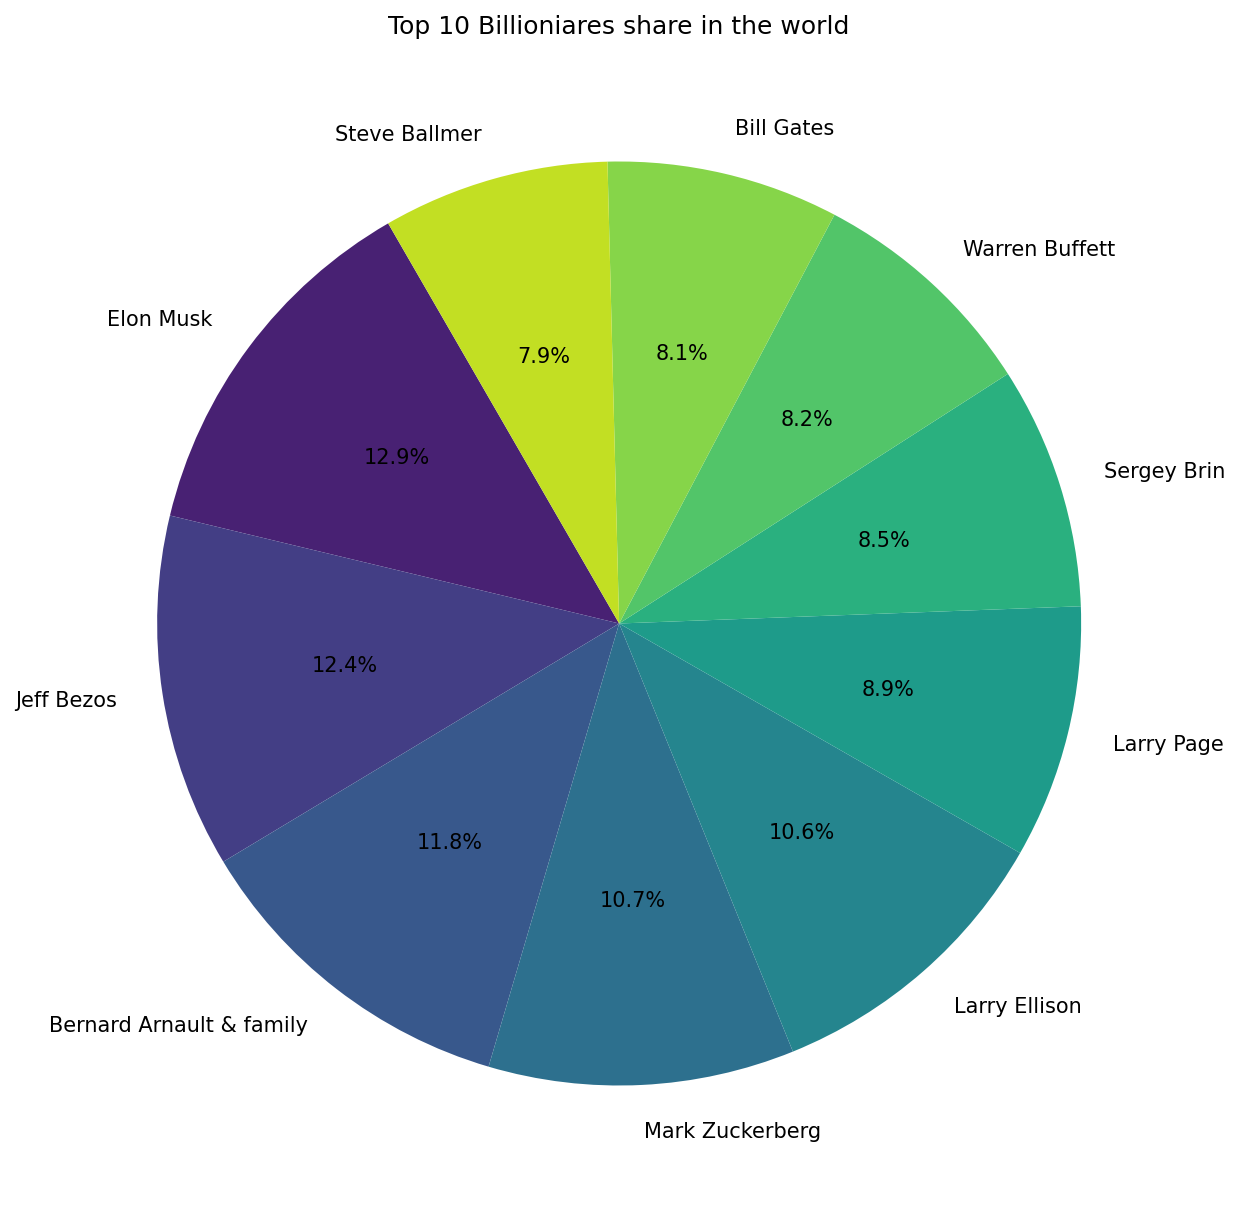

In [20]:
plt.figure(figsize=(10,10),dpi=150)
plt.pie(top_10['NET WORTH'],labels=top_10['EXECUTIVE NAME'],autopct='%1.1f%%',startangle=120,colors=sns.color_palette('viridis',10))
plt.title('Top 10 Billioniares share in the world');

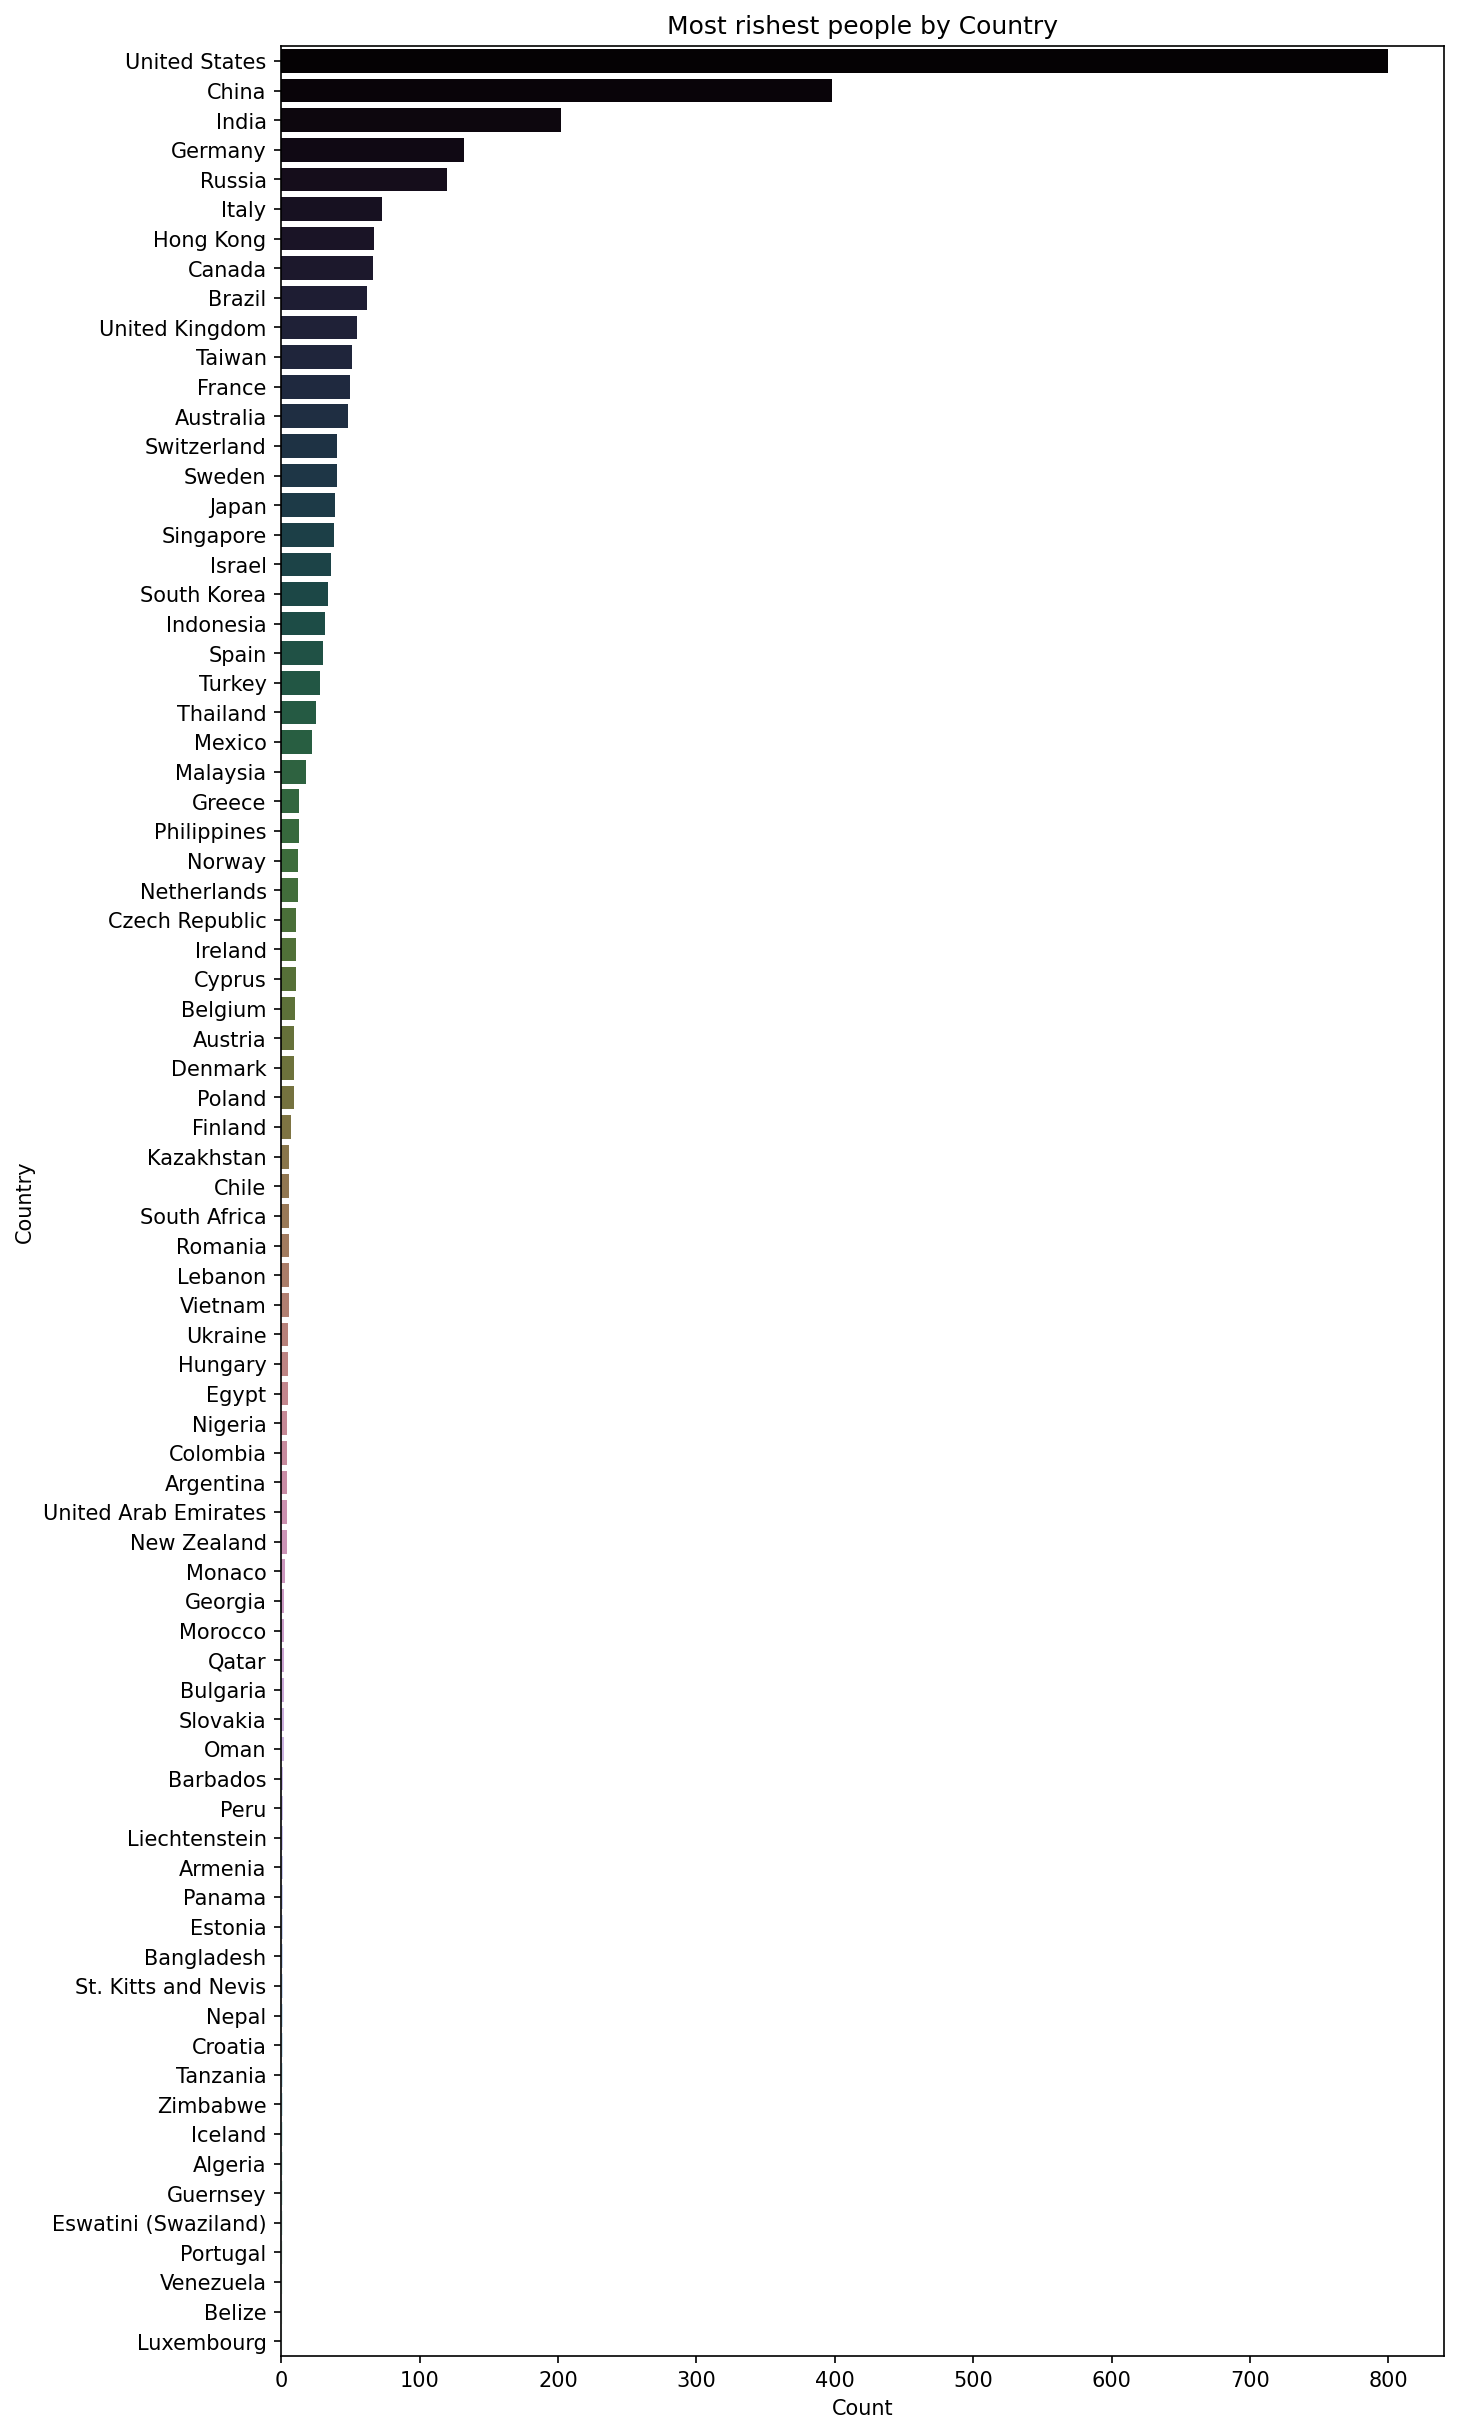

In [21]:
plt.figure(figsize=(10,20),dpi=150)
sns.countplot(data=data , y ='COUNTRY',order=data['COUNTRY'].value_counts().index , palette='cubehelix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Most rishest people by Country');

Text(0.5, 1.0, 'Country wise net worth')

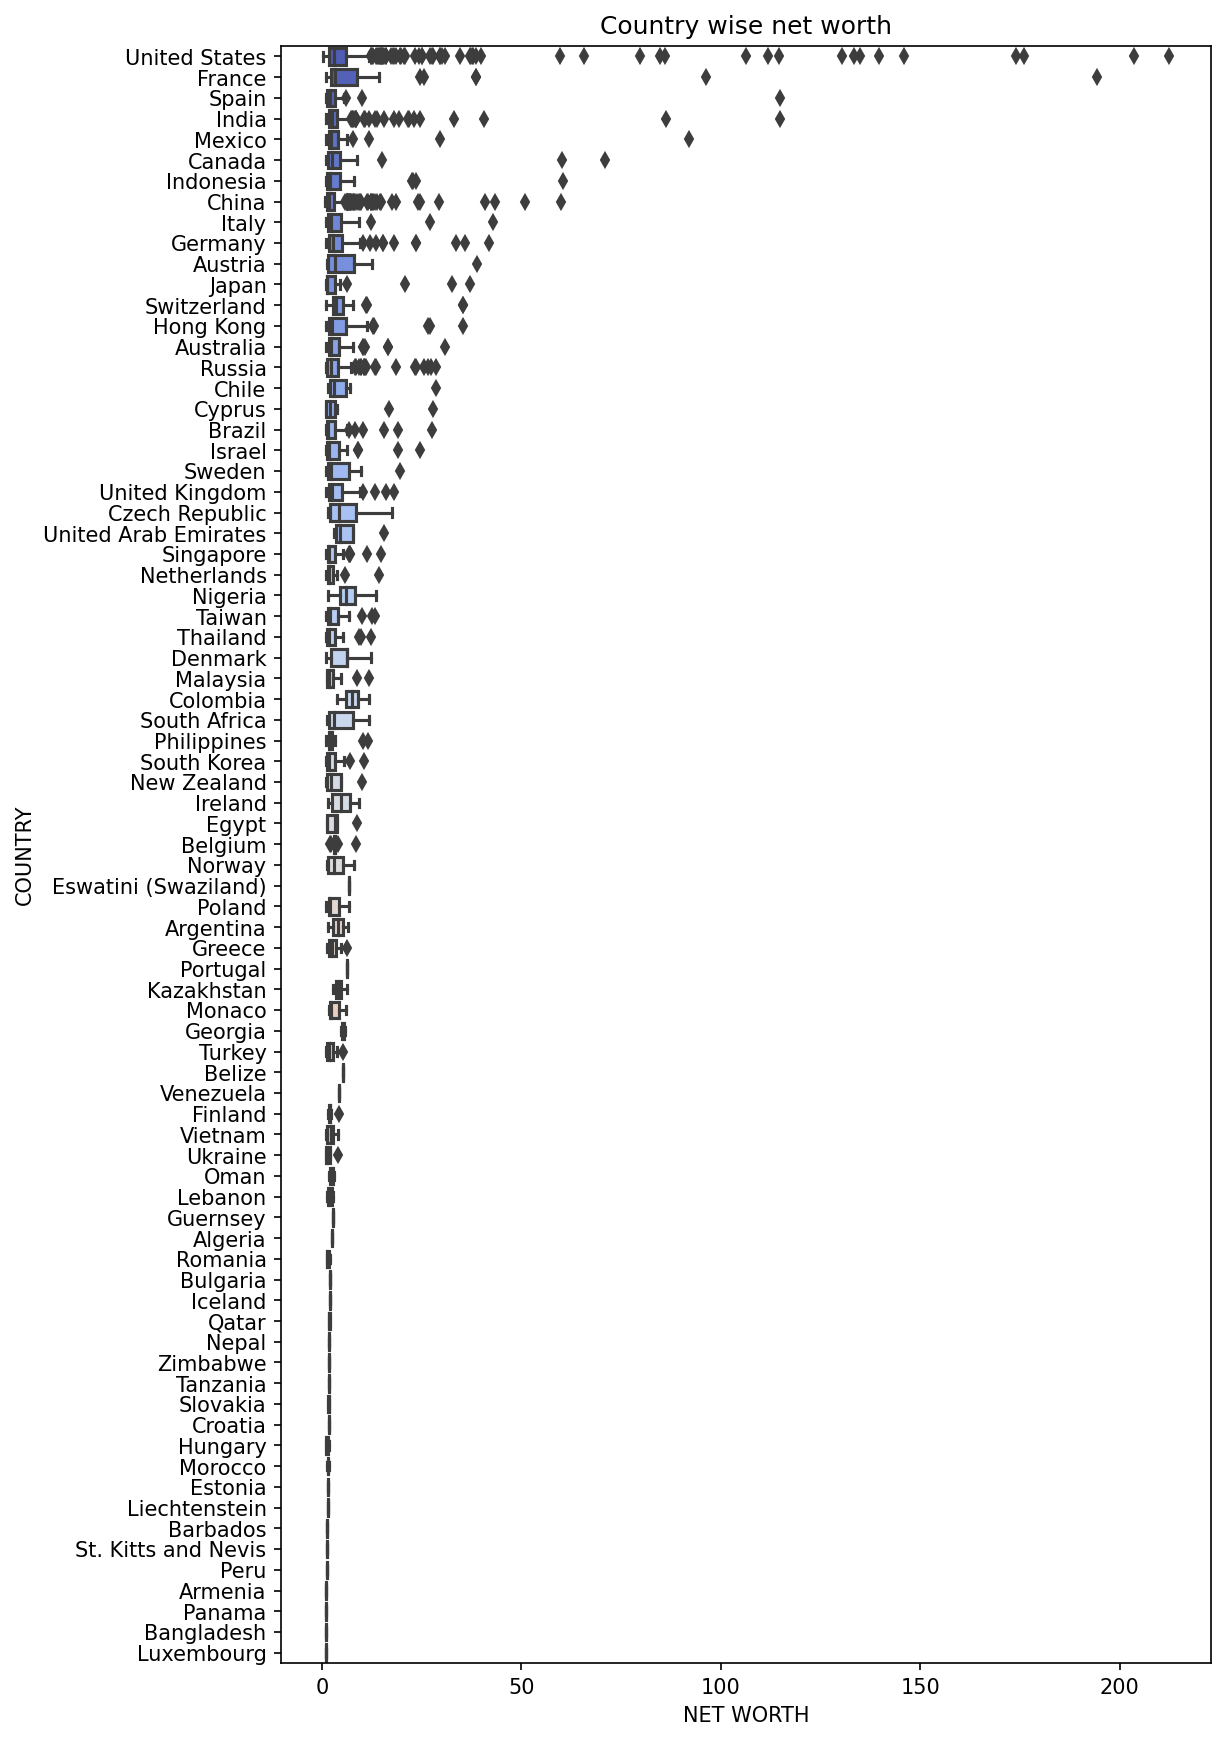

In [22]:
plt.figure(figsize=(8,14),dpi=150)
sns.boxplot(y=data['COUNTRY'] , x=data['NET WORTH'] ,palette='coolwarm')
plt.title('Country wise net worth')